In [ ]:
import pandas as pd
file_path = "Dukes_results_expanded_edited.xlsx"
df = pd.read_excel(file_path)
print(df['Genre'].value_counts())

Genre
News Articles       100
Children's Books     50
Academic Books       50
Poetry               50
Name: count, dtype: int64


<h1>Decision Tree Classification based on Text Characteristics</h1>

In [ ]:
feature_columns = [
    'Sentence Length (Avg)', 'Word Length (Avg)', 'TTR', 'Avg Syllables Per Word', 'Lexical Density', 
    'Pronoun Usage Rate (%)', 'Nominalization Rate (%)', 'Hapax Legomena Ratio (%)', 
    'Abstract vs. Concrete Words Ratio', 
]
target_column = 'Genre'
from sklearn.utils import resample

print("Original Class Distribution:")
print(df[target_column].value_counts())

majority_class = df[target_column].value_counts().idxmax()
minority_classes = df[target_column].value_counts().index.drop(majority_class)

df_majority = df[df[target_column] == majority_class]
df_minority = df[df[target_column].isin(minority_classes)]

df_majority_undersampled = resample(df_majority, 
                                    replace=False,
                                    n_samples=len(df_minority) // len(minority_classes),
                                    random_state=42)

df_balanced = pd.concat([df_majority_undersampled, df_minority])

print("\nBalanced Class Distribution:")
print(df_balanced[target_column].value_counts())

Original Class Distribution:
Genre
News Articles       100
Children's Books     50
Academic Books       50
Poetry               50
Name: count, dtype: int64

Balanced Class Distribution:
Genre
News Articles       50
Children's Books    50
Academic Books      50
Poetry              50
Name: count, dtype: int64


<h1></h1>

Decision Tree Accuracy (Balanced Dataset): 0.925

Decision Tree Classification Report (Balanced Dataset):
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         9
Children's Books       0.83      1.00      0.91        15
   News Articles       1.00      1.00      1.00         6
          Poetry       1.00      0.70      0.82        10

        accuracy                           0.93        40
       macro avg       0.96      0.93      0.93        40
    weighted avg       0.94      0.93      0.92        40

Decision Tree Feature Importance:
 Avg Syllables Per Word               0.414840
Hapax Legomena Ratio (%)             0.396374
TTR                                  0.166765
Pronoun Usage Rate (%)               0.022022
Sentence Length (Avg)                0.000000
Word Length (Avg)                    0.000000
Lexical Density                      0.000000
Nominalization Rate (%)              0.000000
Abstract vs. Concrete W

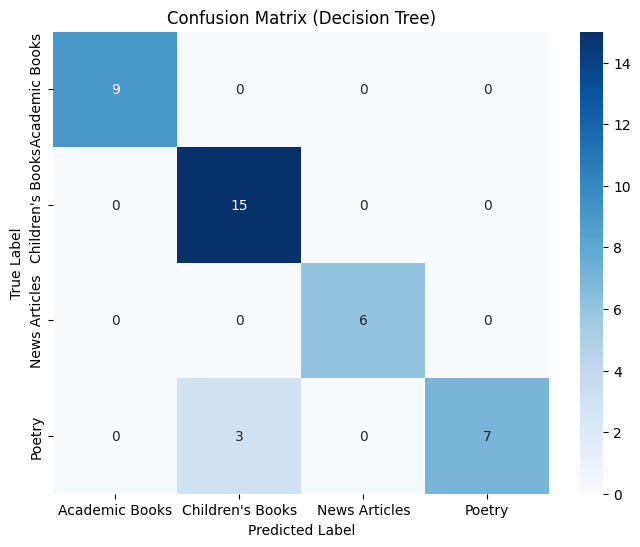

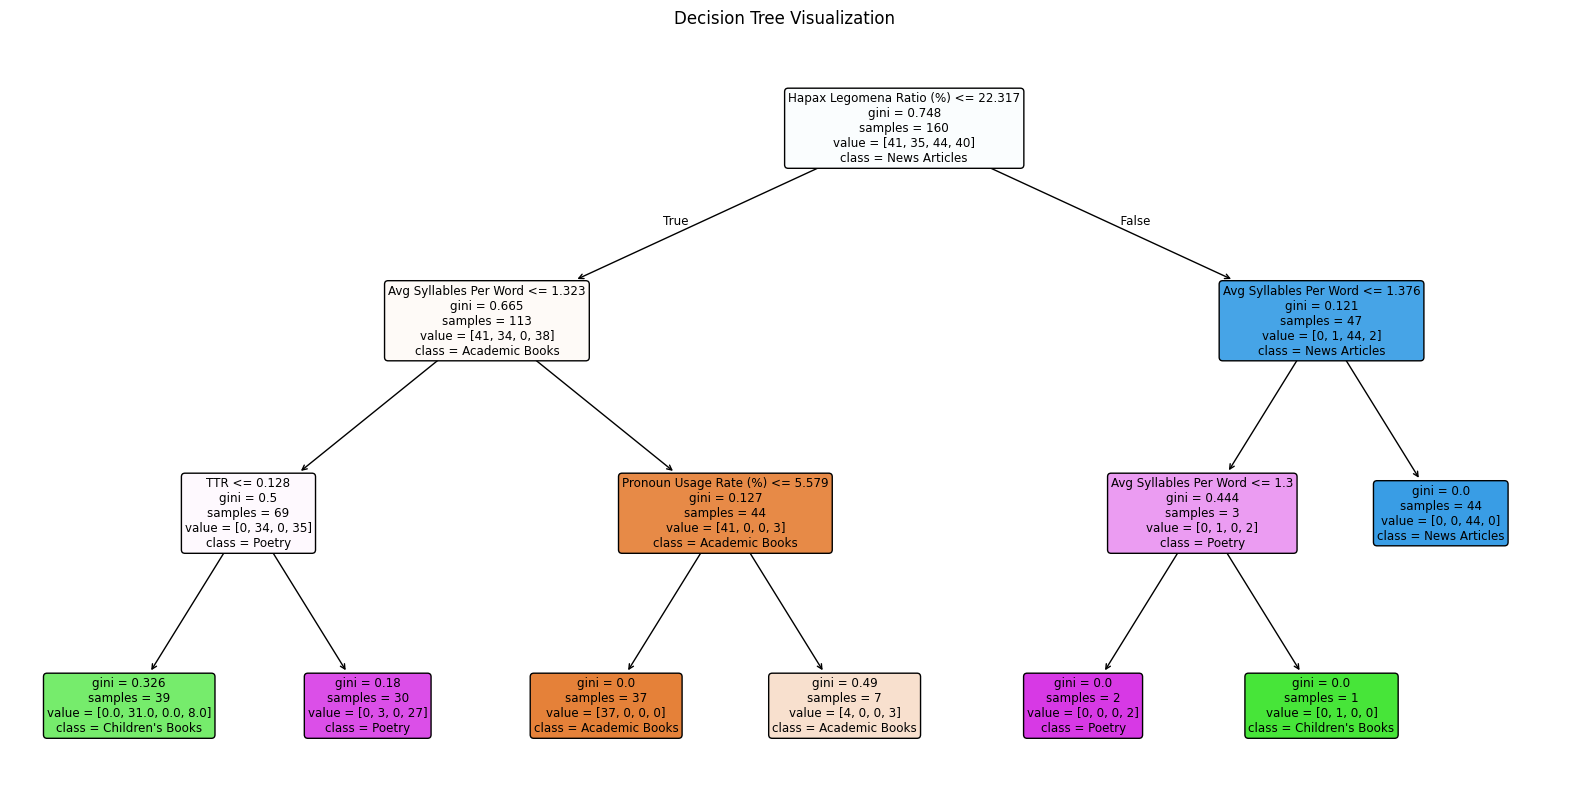

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

label_encoder = LabelEncoder()

X_balanced = df_balanced[feature_columns].astype(float)
y_balanced = df_balanced[target_column]

y_balanced_encoded = label_encoder.fit_transform(y_balanced)

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced_encoded, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_train_balanced, y_train_balanced)

y_pred_dt = dt_clf.predict(X_test_balanced)

print("Decision Tree Accuracy (Balanced Dataset):", accuracy_score(y_test_balanced, y_pred_dt))
print("\nDecision Tree Classification Report (Balanced Dataset):\n", 
      classification_report(y_test_balanced, y_pred_dt, target_names=label_encoder.classes_))

feature_importance = pd.Series(dt_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Decision Tree Feature Importance:\n", feature_importance)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_balanced, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=feature_columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

<h1>Random Forest Classification Based on Text Characteristics</h1>

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.925
Random Forest Accuracy: 0.93

Classification Report:
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         9
Children's Books       0.93      0.87      0.90        15
   News Articles       1.00      1.00      1.00         6
          Poetry       0.82      0.90      0.86        10

        accuracy                           0.93        40
       macro avg       0.94      0.94      0.94        40
    weighted avg       0.93      0.93      0.93        40

Random Forest Feature Importance:
 TTR                                  0.250544
Hapax Legomena Ratio (%)             0.227802
Avg Syllables Per Word               0.158740
Pronoun Usage Rate (%)               0.114649
Word Length (Avg)                    0.104517
Nominalization Rate (%)              0.053890
Abstract v

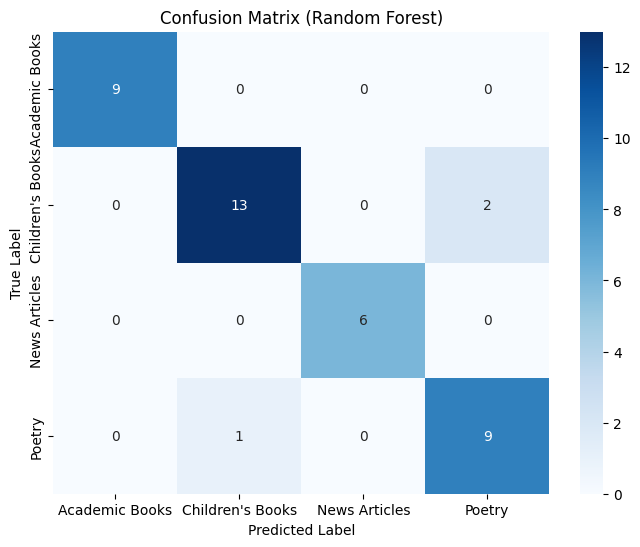

Cross-Validation Accuracy Scores: [0.85 0.95 0.95 0.9  0.9 ]
Mean CV Accuracy: 0.9099999999999999


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_balanced[feature_columns].astype(float)
y = df_balanced[target_column]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_rf_clf = grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)

y_pred_rf = best_rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

rf_feature_importance = pd.Series(best_rf_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Random Forest Feature Importance:\n", rf_feature_importance)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

cv_scores = cross_val_score(best_rf_clf, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

<h1>Decision Tree Classification Based on Readability Metrics</h1>

In [ ]:
feature_columns = [
    'Flesch Reading Ease', 'Flesch-Kincaid Grade Level', 
    'SMOG Index', 'Dale-Chall Readability Score', 'Automated Readability Index', 
    'Gunning Fog Index', 'Linsear Write Formula', 'FORCAST Readability Score'
]
target_column = 'Genre'

Decision Tree Accuracy (Balanced Dataset): 0.975

Decision Tree Classification Report (Balanced Dataset):
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         9
Children's Books       1.00      0.93      0.97        15
   News Articles       1.00      1.00      1.00         6
          Poetry       0.91      1.00      0.95        10

        accuracy                           0.97        40
       macro avg       0.98      0.98      0.98        40
    weighted avg       0.98      0.97      0.98        40

Decision Tree Feature Importance:
 Dale-Chall Readability Score    0.600350
FORCAST Readability Score       0.345815
SMOG Index                      0.036215
Flesch Reading Ease             0.017620
Flesch-Kincaid Grade Level      0.000000
Automated Readability Index     0.000000
Gunning Fog Index               0.000000
Linsear Write Formula           0.000000
dtype: float64


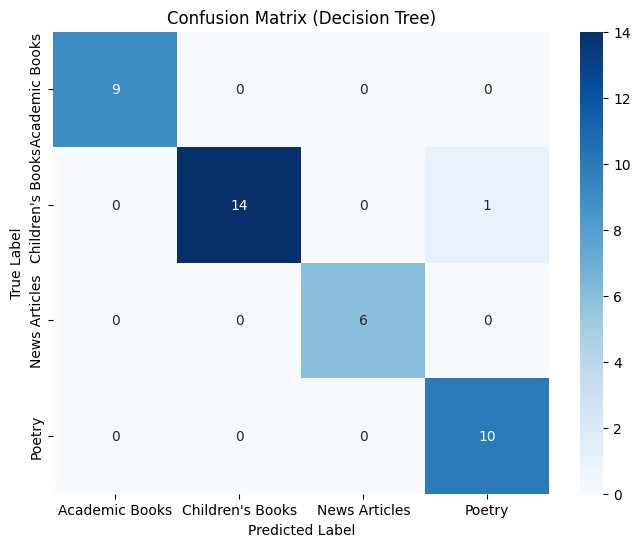

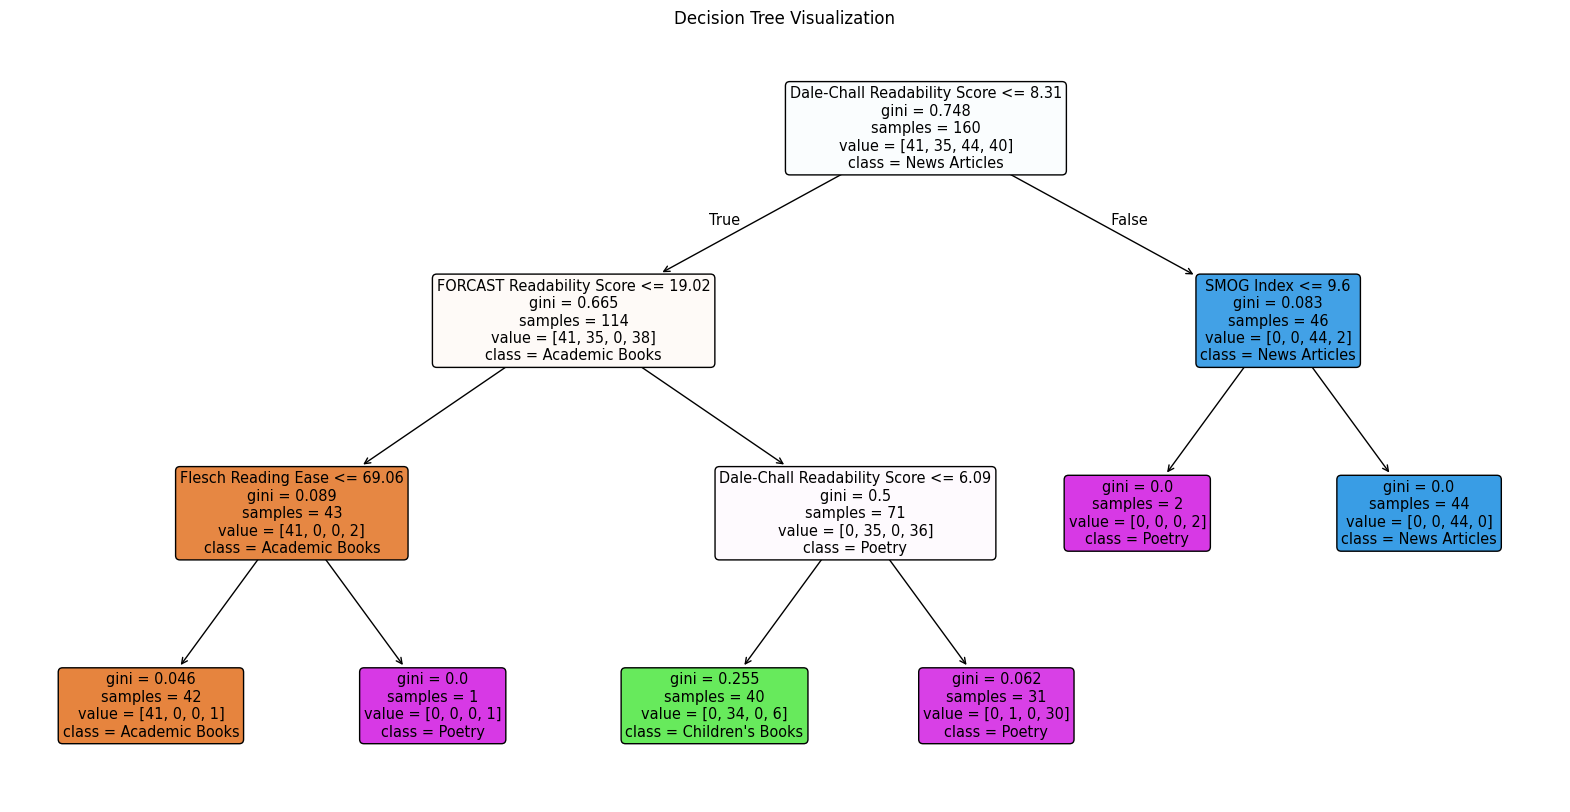

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

label_encoder = LabelEncoder()

X_balanced = df_balanced[feature_columns].astype(float)
y_balanced = df_balanced[target_column]

y_balanced_encoded = label_encoder.fit_transform(y_balanced)

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced_encoded, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_train_balanced, y_train_balanced)

y_pred_dt = dt_clf.predict(X_test_balanced)

print("Decision Tree Accuracy (Balanced Dataset):", accuracy_score(y_test_balanced, y_pred_dt))
print("\nDecision Tree Classification Report (Balanced Dataset):\n", 
      classification_report(y_test_balanced, y_pred_dt, target_names=label_encoder.classes_))

feature_importance = pd.Series(dt_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Decision Tree Feature Importance:\n", feature_importance)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_balanced, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=feature_columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

<h1>Random Forest Classification Based on Readability Metrics</h1>

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9125
Random Forest Accuracy: 0.95

Classification Report:
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         9
Children's Books       1.00      0.87      0.93        15
   News Articles       1.00      1.00      1.00         6
          Poetry       0.83      1.00      0.91        10

        accuracy                           0.95        40
       macro avg       0.96      0.97      0.96        40
    weighted avg       0.96      0.95      0.95        40

Random Forest Feature Importance:
 Dale-Chall Readability Score    0.333285
SMOG Index                      0.172190
FORCAST Readability Score       0.148035
Flesch Reading Ease             0.106811
Automated Readability Index     0.077839
Gunning Fog Index               0.073334
Flesch-Kincaid Grade Level      0.047163
L

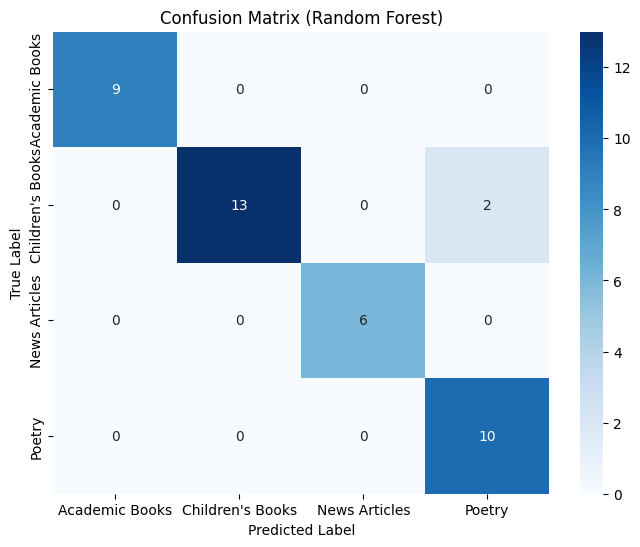

Cross-Validation Accuracy Scores: [0.95  0.975 0.9   0.925 0.85 ]
Mean CV Accuracy: 0.9199999999999999


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_balanced[feature_columns].astype(float)
y = df_balanced[target_column]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_rf_clf = grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)

y_pred_rf = best_rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

rf_feature_importance = pd.Series(best_rf_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Random Forest Feature Importance:\n", rf_feature_importance)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

cv_scores = cross_val_score(best_rf_clf, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

<h1>Decision Tree Classification All Features</h1>

In [ ]:
feature_columns = [
    'Sentence Length (Avg)', 'Word Length (Avg)', 'TTR', 'Avg Syllables Per Word', 'Lexical Density', 
    'Pronoun Usage Rate (%)', 'Nominalization Rate (%)', 'Hapax Legomena Ratio (%)', 
    'Abstract vs. Concrete Words Ratio', 'Flesch Reading Ease', 'Flesch-Kincaid Grade Level', 
    'SMOG Index', 'Dale-Chall Readability Score', 'Automated Readability Index', 
    'Gunning Fog Index', 'Linsear Write Formula', 'FORCAST Readability Score'
]
target_column = 'Genre'

Decision Tree Accuracy (Balanced Dataset): 0.975

Decision Tree Classification Report (Balanced Dataset):
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         9
Children's Books       1.00      0.93      0.97        15
   News Articles       1.00      1.00      1.00         6
          Poetry       0.91      1.00      0.95        10

        accuracy                           0.97        40
       macro avg       0.98      0.98      0.98        40
    weighted avg       0.98      0.97      0.98        40

Decision Tree Feature Importance:
 Dale-Chall Readability Score         0.600350
FORCAST Readability Score            0.345815
Avg Syllables Per Word               0.036215
Hapax Legomena Ratio (%)             0.017620
Flesch-Kincaid Grade Level           0.000000
Linsear Write Formula                0.000000
Gunning Fog Index                    0.000000
Automated Readability Index          0.000000
SMOG Index             

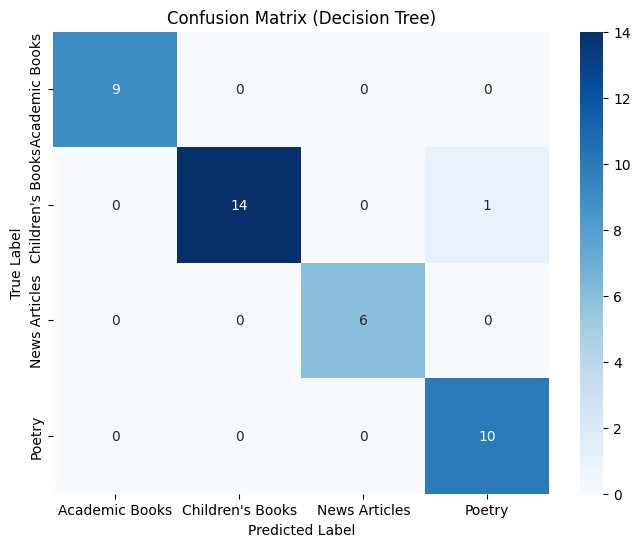

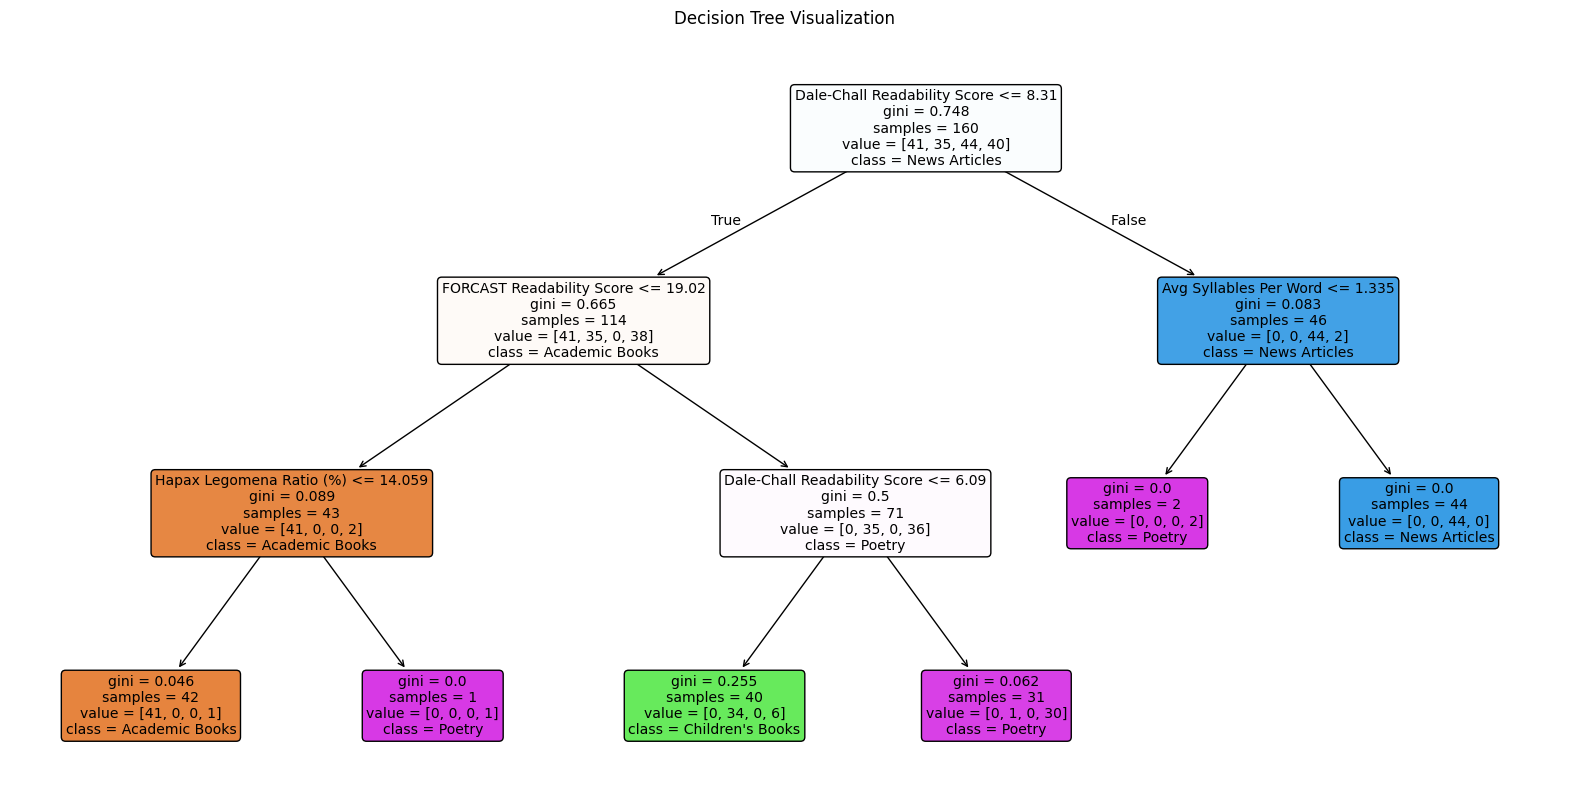

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

label_encoder = LabelEncoder()

X_balanced = df_balanced[feature_columns].astype(float)
y_balanced = df_balanced[target_column]

y_balanced_encoded = label_encoder.fit_transform(y_balanced)

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced_encoded, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_train_balanced, y_train_balanced)

y_pred_dt = dt_clf.predict(X_test_balanced)

print("Decision Tree Accuracy (Balanced Dataset):", accuracy_score(y_test_balanced, y_pred_dt))
print("\nDecision Tree Classification Report (Balanced Dataset):\n", 
      classification_report(y_test_balanced, y_pred_dt, target_names=label_encoder.classes_))

feature_importance = pd.Series(dt_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Decision Tree Feature Importance:\n", feature_importance)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_balanced, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=feature_columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

<h1>Random Forest Classification All Features</h1>

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.925
Random Forest Accuracy: 0.97

Classification Report:
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         9
Children's Books       1.00      0.93      0.97        15
   News Articles       1.00      1.00      1.00         6
          Poetry       0.91      1.00      0.95        10

        accuracy                           0.97        40
       macro avg       0.98      0.98      0.98        40
    weighted avg       0.98      0.97      0.98        40

Random Forest Feature Importance:
 TTR                                  0.187365
Dale-Chall Readability Score         0.162436
Hapax Legomena Ratio (%)             0.118921
FORCAST Readability Score            0.082582
Avg Syllables Per Word               0.078950
Flesch Reading Ease                  0.073658
SMOG Index   

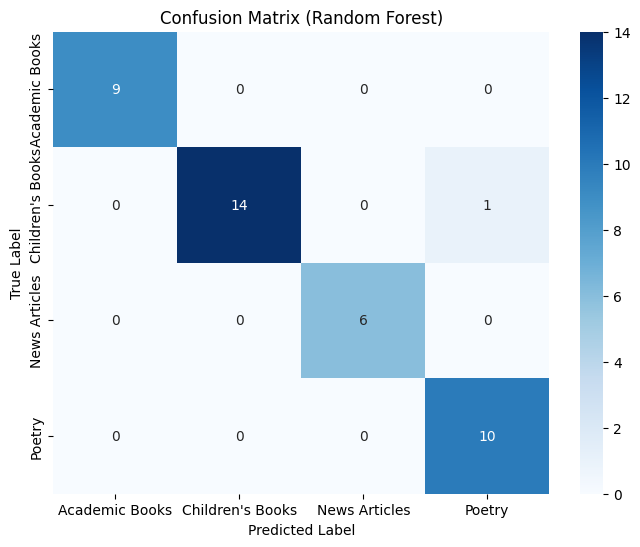

Cross-Validation Accuracy Scores: [0.95  0.975 0.95  0.9   0.875]
Mean CV Accuracy: 0.93


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_balanced[feature_columns].astype(float)
y = df_balanced[target_column]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_rf_clf = grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)

y_pred_rf = best_rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

rf_feature_importance = pd.Series(best_rf_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Random Forest Feature Importance:\n", rf_feature_importance)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

cv_scores = cross_val_score(best_rf_clf, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

<h1>Best Results so far</h1>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

label_encoder = LabelEncoder()

X_balanced = df_balanced[feature_columns].astype(float)
y_balanced = df_balanced[target_column]

y_balanced_encoded = label_encoder.fit_transform(y_balanced)

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced_encoded, test_size=0.2, random_state=42)

rf_clf_balanced = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf_balanced.fit(X_train_balanced, y_train_balanced)

y_pred_rf_balanced = rf_clf_balanced.predict(X_test_balanced)

print("Random Forest Accuracy (Balanced Dataset):", accuracy_score(y_test_balanced, y_pred_rf_balanced))
print("\nRandom Forest Classification Report (Balanced Dataset):\n", 
      classification_report(y_test_balanced, y_pred_rf_balanced, target_names=label_encoder.classes_))

rf_feature_importance_balanced = pd.Series(rf_clf_balanced.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Random Forest Feature Importance (Balanced Dataset):\n", rf_feature_importance_balanced)

Random Forest Accuracy (Balanced Dataset): 0.975

Random Forest Classification Report (Balanced Dataset):
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         9
Children's Books       1.00      0.93      0.97        15
   News Articles       1.00      1.00      1.00         6
          Poetry       0.91      1.00      0.95        10

        accuracy                           0.97        40
       macro avg       0.98      0.98      0.98        40
    weighted avg       0.98      0.97      0.98        40

Random Forest Feature Importance (Balanced Dataset):
 Dale-Chall Readability Score    0.343488
FORCAST Readability Score       0.150876
SMOG Index                      0.141772
Flesch Reading Ease             0.101029
Automated Readability Index     0.077018
Gunning Fog Index               0.075968
Flesch-Kincaid Grade Level      0.058000
Linsear Write Formula           0.051848
dtype: float64
